$\def\tcoreleft{\underset{\tiny\mid}{\textcolor{MidnightBlue}{⦸}}}$
$\def\tcorecenter{\underset{\tiny\mid}{\textcolor{RedOrange}{⦿}}}$
$\def\tcoreright{\underset{\tiny\mid}{\textcolor{MidnightBlue}{\oslash}}}$
<h1 style="text-align: center;"><b>TMQS Workshop 2024</b> @ Zuse Institute Berlin</h1>
<h2 style="text-align: center;">Summer School on Tensor Methods for Quantum Simulation</h2>
<h2 style="text-align: center;">June 3 - 5, 2024</h2>
<h1 style="text-align: center; background-color:#D6EAF8 ;padding:50px">$\tcoreleft - \tcoreleft - \tcoreleft - \cdots - \tcorecenter - \cdots - \tcoreright - \tcoreright$</h1>
</br>

***

## **Session 1 - Tensor Basics**

***

## Exercise 1.1

... a bit of theory to begin with.

The following exercises are intended to demonstrate to you that one can handle tensors in a very natural way, much like with classical vectors and matrices. In the end, standard linear algebra provides the foundational understanding necessary to grasp the concepts of tensors effectively. By extending basic concepts, tensors offer a powerful framework for describing and manipulating multidimensional data in various fields such as physics, engineering, and machine learning.

Suppose $T$ and $U$ are tensors in $\mathbb{C}^{N}$, where $N = (n_1, \dots , n_d)$ and $d \in \mathbb{N}$. Furthermore, let $G, H \in \mathbb{C}^{N \times N}$. Show that

**a)**$\quad T^\dagger \cdot U = \langle \text{vec}(T), \text{vec}(U) \rangle$

**b)**$\quad \lVert T \rVert_F = \lVert \text{vec}(T) \rVert_2$

**c)**$\quad \text{tr}(G^\dagger \cdot H) = \langle \text{vec}(G), \text{vec}(H) \rangle$

***

$\textcolor{red}{\textbf{SOLUTION:}}$

**a)**$\quad$$T^\dagger \cdot U = \sum_{i_1 = 1}^{n_1} \cdot \sum_{i_d = 1}^{n_d} \overline{T}_{i_1, \dots, i_d} \cdot U_{i_1, \dots, i_d} = \sum_{i=1}^{n_1 \cdot \ldots \cdot n_d} \overline{\text{vec}(T)_i} \cdot \text{vec}(U)_i = \langle \text{vec}(T), \text{vec}(U) \rangle$

**b)**$\quad$$\lVert T \rVert_F^2 = \sum_{i_1 = 1}^{n_1} \cdots \sum_{i_d = 1}^{n_d} |T_{i_1, \dots, i_d}|^2 = \sum_{i=1}^{n_1 \cdot \ldots \cdot n_d} |\text{vec}(T)_i|^2 = \lVert \text{vec}(T) \rVert_2^2$

**c)**$\quad$$\text{tr}(G^\dagger \cdot H) = \sum_{i_1=1}^{n_1} \cdots \sum_{i_d=1}^{n_d} \sum_{j_1=1}^{n_1} \cdots \sum_{j_d=1}^{n_d} G^\dagger_{i_1, \dots, i_d, j_1 , \dots, j_d} \cdot H_{j_1, \dots, j_d, i_1, \dots, i_d} = \sum_{i=1}^{n_1^2 \cdot \ldots \cdot n_d^2} \overline{\text{vec}(G)_i} \cdot \text{vec}(H)_i = \langle \text{vec}(G), \text{vec}(H) \rangle$

***

## Exercise 1.2 

... now onto the basic implementation

We turn to the practical implementation of tensors and their limitations. Tensors in full format can be easily created and multiplied/contracted in Python using the standard package NumPy:

> import numpy as np

In addition, we also need the Matplotlib and time package for this task:

> import matplotlib.pyplot as plt
> 
> import time

Create random order-$d$ tensors in $\mathbb{R}^{N \times N}$ with $N=(2,\dots,2)$ for different dimensions $d = 1, 2, \dots, 10$:

> T = np.random.random_sample(2*d*[2])

Compute the storage (```T.size * T.itemsize```) of every instance and plot the results:

> plt.plot(np.arange(1,11), storage)

Rerun the expriment and reshape every instance into an array in $\mathbb{R}^{2^d \times 2^d}$ and compute an SVD:

> T_mat = T.reshape([2** d, 2**d])
>
> U, S, Vt = np.linalg.svd(T)

Measure the CPU time using:

> start_time = time.time()
>
> ...
>
> end_time = time.time() - start_time

Plot the results and interpret both plots in terms of storage consumption and computational complexity, respectively. Given a matrix $M \in \mathbb{R}^{m \times n}$, $m \geq n$, the overall cost for computing an SVD is $O(m n^2)$.

***

$\textcolor{red}{\textbf{SOLUTION:}}$

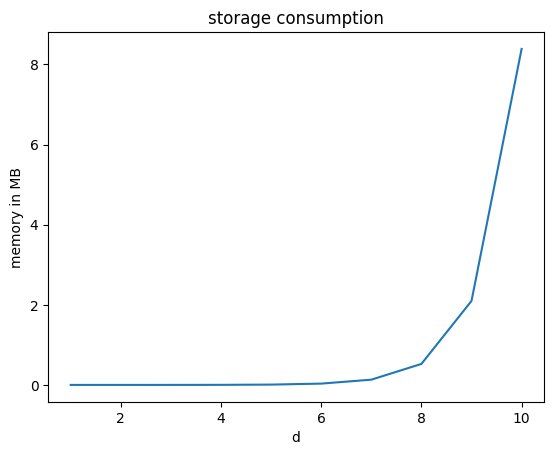

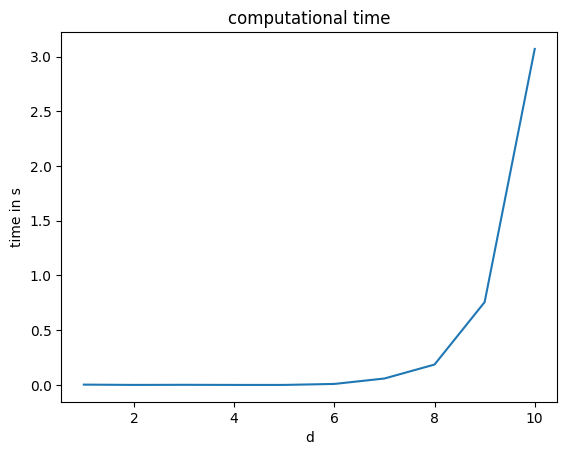

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt

storage = []
times = []
for d in range(1,11):
    T = np.random.random_sample(2*d*[2])
    storage.append(T.size*T.itemsize/1e6)
    T = T.reshape([2**d, 2**d])
    start_time = time.time()
    U, S, Vt = np.linalg.svd(T)
    end_time = time.time() - start_time
    times.append(end_time)

plt.figure()
plt.title('storage consumption')
plt.xlabel('d')
plt.ylabel('memory in MB')
plt.plot(np.arange(1,11), storage)

plt.figure()
plt.title('computational time')
plt.xlabel('d')
plt.ylabel('time in s')
plt.plot(np.arange(1,11), times)

***

## Exercise 1.3 

Lastly, we will create a special form of tensor, sometimes called the delta tensor. We define $\Delta \in \mathbb{R}^{n \times n \times n}$ as

$\hspace{1cm}$$\Delta_{i,j,k} = \begin{cases} 1 & \text{if}~i=j=k\\ 0& \text{otherwise.}\end{cases}$

Now, we want to try various contractions with this tensor. To do this, let's choose $n=3$ and additionally define the vectors $v=(1,2,3)$ and $w=(4,5,6)$.

Use NumPy's einsum function to compute the following contractions:

\begin{array}{}
  &   &   &   &   &                    &         & v &           &                    &   &         &   &           &   \\
  &   &   &   &   &                    &         & | &           &                    &   &         & | &           &   \\
- & D & = & D & - & \qquad\qquad\qquad &         & D &           & \qquad\qquad\qquad &   &         & D &           &   \\
  &   &   &   &   &                    & \diagup &   & \diagdown &                    &   & \diagup &   & \diagdown &   \\
  &   &   &   &   &                    &         &   &           &                    & v &         &   &           & w
\end{array}

Examine the results and try to explain how they arise.

*Hint:* In order to contract two or more tensors with NumPy's einsum function, assign a variable (```i, j, k, ...```) to each mode of the tensors. Modes that are to be contracted receive the same variables. Example: ```np.einsum('ijk, jl -> ikl', T_1, T_2)``` contracts an order-3 tensor $T_1$ and a matrix $T_2$ on a common mode (second of $T_1$, first of $T_2$). The result is again an order-3 tensor.

***

$\textcolor{red}{\textbf{SOLUTION:}}$

In [22]:
import numpy as np

D = np.zeros([3,3,3])
for i in range(3):
    D[i,i,i] = 1

v = np.array([1,2,3])
w = np.array([4,5,6])

print('-D=D-')
print(' ')
print(np.einsum('ijk,ljk->il', D, D))
print(' ')
print('----')
print(' ')

print(' v ')
print(' | ')
print('-D-')
print(' ')
print(np.einsum('ijk,k->ij', D, v))
print(' ')
print('----')
print(' ')

print('  |  ')
print('v-D-w')
print(' ')
print(np.einsum('ijk,j,k->i', D, v, w))

-D=D-
 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 
----
 
 v 
 | 
-D-
 
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
 
----
 
  |  
v-D-w
 
[ 4. 10. 18.]
